# Setup

In [1]:
from dslabs_functions import get_variable_types
from seaborn import heatmap
from dslabs_functions import HEIGHT, plot_multi_scatters_chart
from matplotlib.pyplot import figure, subplots, savefig, show, gcf
from dslabs_functions import plot_bar_chart
from dslabs_functions import set_chart_labels
from dslabs_functions import define_grid, HEIGHT
from matplotlib.figure import Figure
from numpy import ndarray
from dslabs_functions import *
from pandas import read_csv, DataFrame
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart
import pandas as pd

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 200)

In [3]:
results = "csv-results/credit-score-after-preparation.csv"
file_tag = "credit_score"
data: DataFrame = read_csv(results, index_col="ID")

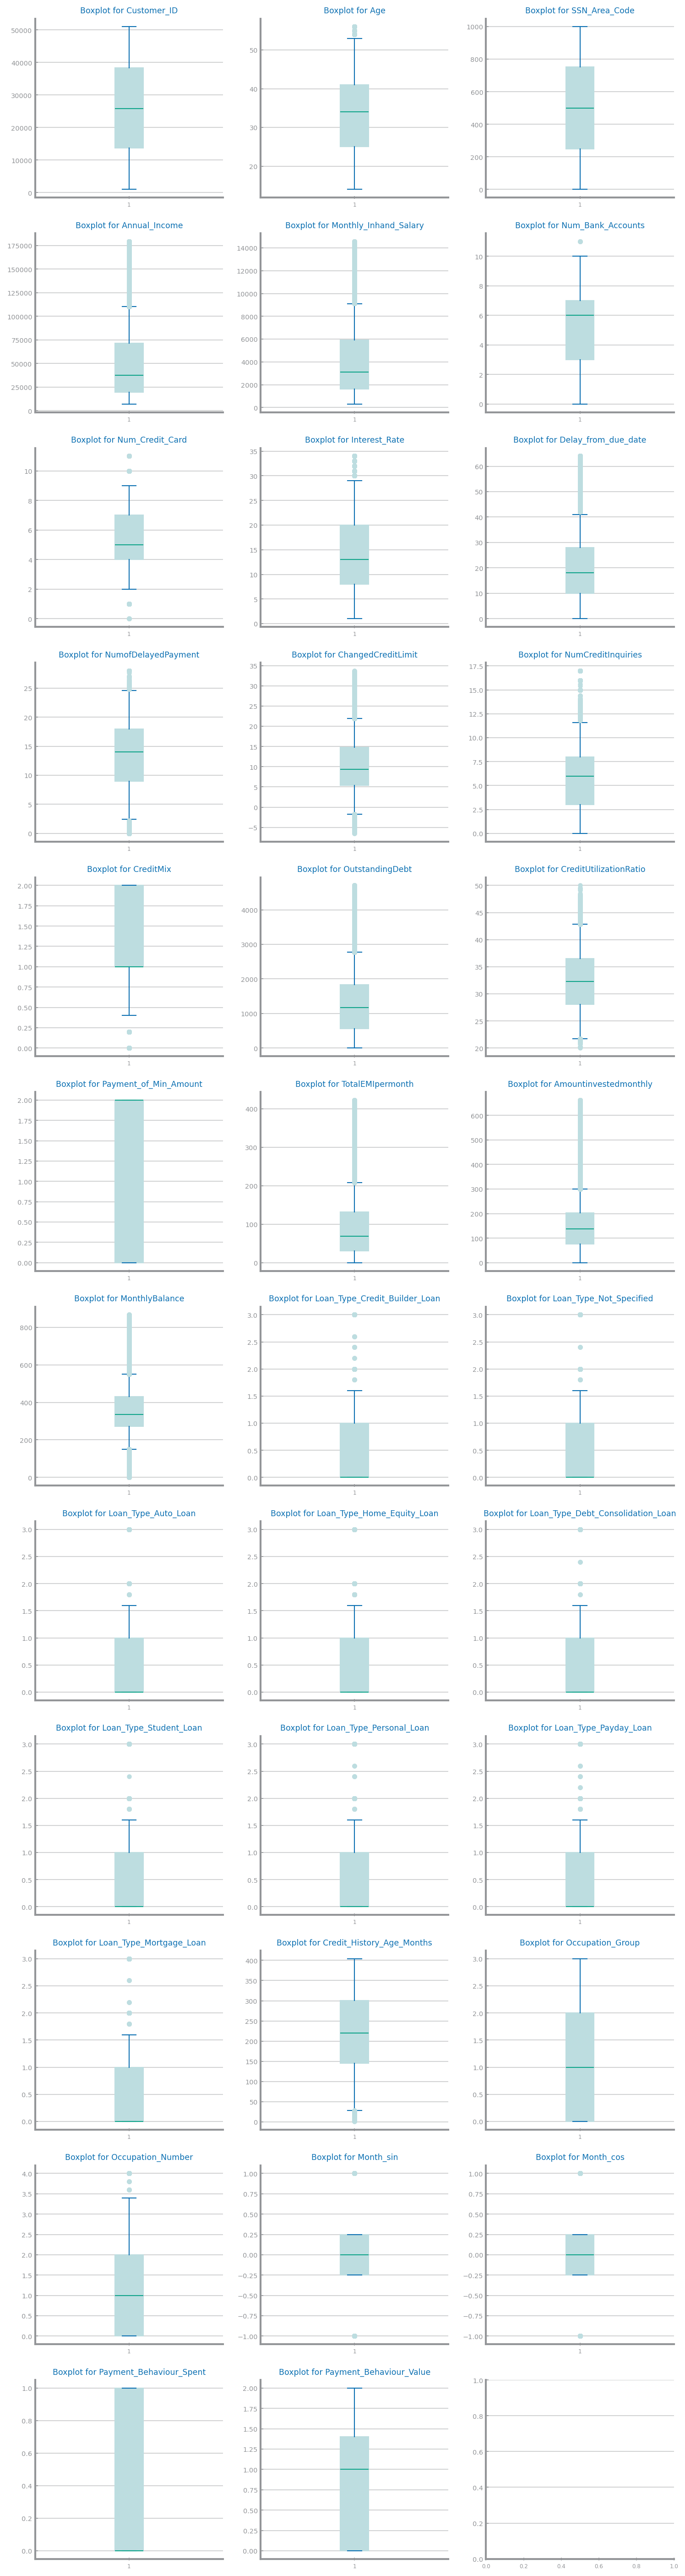

In [4]:
# SINGULAR BOXPLOT

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]

rows: int
cols: int
rows, cols = define_grid(len(numeric))
fig: Figure
axs: ndarray

fig, axs = subplots(
    rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
)

i, j = 0, 0
for n in range(len(numeric)):
    axs[i, j].set_title("Boxplot for %s" % numeric[n])
    axs[i, j].boxplot(data[numeric[n]].dropna().values)
    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
savefig(f"images/{file_tag}_single_boxplots_after_prep.png", bbox_inches="tight")
show()

**IMPORTANT REMINDER:** Remember that balancing cannot be applied to the test dataset, and that the evaluation of the models has to be done over an independent dataset (test set).

In [5]:
from sklearn.model_selection import train_test_split

# UNCOMMENT IF BALANCING IS APPLIED:
# data_to_split = read_csv('csv-results/credit-score-before-balancing')

data_to_split = data.copy()

# Split train/test

target = 'Credit_Score'
y = data_to_split[target]
X = data_to_split.drop(columns = target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

labels = data.Credit_Score.unique()

vars = data.columns.to_list()
vars.remove('Credit_Score')

In [6]:
trnX, trnY, tstX, tstY = X_train, y_train, X_test, y_test

# Naive Bayes

## Approaches study

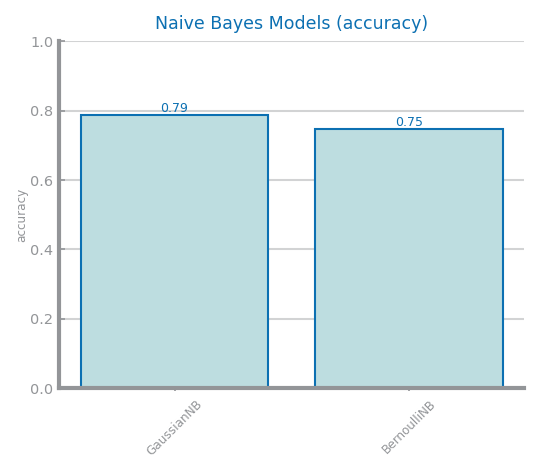

'\neval_metric = \'recall\'\nfigure()\nbest_model_recall, params_recall = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)\nsavefig(f"images/modeling/{file_tag}_nb_{eval_metric}_study.png")\nshow()\n'

In [7]:
from numpy import array, ndarray
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart


def naive_Bayes_study(
    trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, metric: str = "accuracy"
) -> tuple:
    estimators: dict = {
        "GaussianNB": GaussianNB(),
        # "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
    }

    xvalues: list = []
    yvalues: list = []
    best_model = None
    best_params: dict = {"name": "", "metric": metric, "params": ()}
    best_performance = 0
    for clf in estimators:
        xvalues.append(clf)
        estimators[clf].fit(trnX, trnY)
        prdY: array = estimators[clf].predict(tstX)
        eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
        if eval - best_performance > DELTA_IMPROVE:
            best_performance: float = eval
            best_params["name"] = clf
            best_params[metric] = eval
            best_model = estimators[clf]
        yvalues.append(eval)
        # print(f'NB {clf}')
    plot_bar_chart(
        xvalues,
        yvalues,
        title=f"Naive Bayes Models ({metric})",
        ylabel=metric,
        percentage=True,
    )

    return best_model, best_params


eval_metric = 'accuracy'
figure()
best_model_acc, params_acc = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
savefig(f"images/modeling/{file_tag}_nb_{eval_metric}_study.png")
show()

'''
eval_metric = 'recall'
figure()
best_model_recall, params_recall = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
savefig(f"images/modeling/{file_tag}_nb_{eval_metric}_study.png")
show()
'''

## Best results

<Figure size 600x450 with 0 Axes>

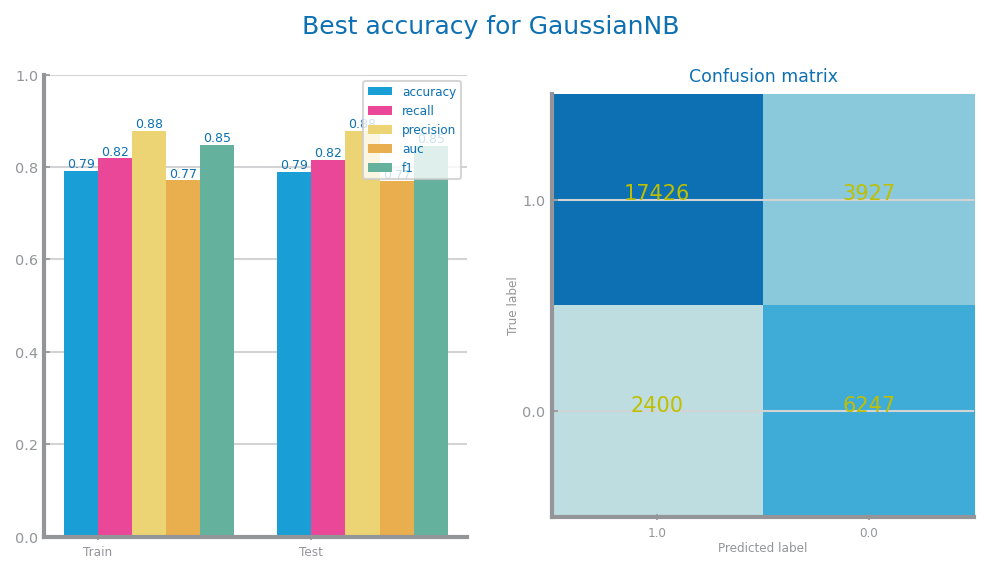

'\neval_metric = \'recall\'\nprd_trn: array = best_model_recall.predict(trnX)\nprd_tst: array = best_model_recall.predict(tstX)\nfigure()\nplot_evaluation_results(params_recall, y_train, prd_trn, tstY, prd_tst, labels)\nsavefig(f\'images/modeling/{file_tag}_{params_recall["name"]}_best_{params_recall["metric"]}_eval.png\')\nshow()\n'

In [8]:
# Performance analysis

from dslabs_functions import plot_evaluation_results

eval_metric = 'accuracy'
prd_trn: array = best_model_acc.predict(trnX)
prd_tst: array = best_model_acc.predict(tstX)
figure()
plot_evaluation_results(params_acc, y_train, prd_trn, tstY, prd_tst, labels)
savefig(f'images/modeling/{file_tag}_{params_acc["name"]}_best_{params_acc["metric"]}_eval.png')
show()

'''
eval_metric = 'recall'
prd_trn: array = best_model_recall.predict(trnX)
prd_tst: array = best_model_recall.predict(tstX)
figure()
plot_evaluation_results(params_recall, y_train, prd_trn, tstY, prd_tst, labels)
savefig(f'images/modeling/{file_tag}_{params_recall["name"]}_best_{params_recall["metric"]}_eval.png')
show()
'''

# KNN

## Parameters study

KNN best with k=5 and manhattan


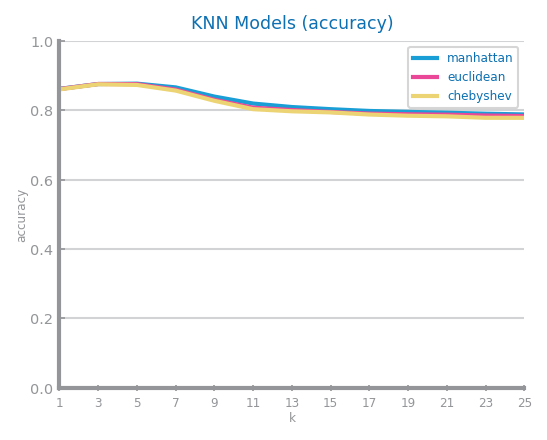

"\neval_metric = 'recall'\nfigure()\nbest_model_recall, params_recall = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)\nsavefig(f'images/modeling/{file_tag}_knn_{eval_metric}_study.png')\nshow()\n"

In [9]:
from typing import Literal
from numpy import array, ndarray
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart
from dslabs_functions import read_train_test_from_files, plot_evaluation_results

def knn_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, k_max: int=19, lag: int=2, metric='accuracy'
        ) -> tuple[KNeighborsClassifier | None, dict]:
    dist: list[Literal['manhattan', 'euclidean', 'chebyshev']] = ['manhattan', 'euclidean', 'chebyshev']

    kvalues: list[int] = [i for i in range(1, k_max+1, lag)]
    best_model: KNeighborsClassifier | None = None
    best_params: dict = {'name': 'KNN', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict[str, list] = {}
    for d in dist:
        y_tst_values: list = []
        for k in kvalues:
            clf = KNeighborsClassifier(n_neighbors=k, metric=d)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance: float = eval
                best_params['params'] = (k, d)
                best_model = clf
            # print(f'KNN {d} k={k}')
        values[d] = y_tst_values
    print(f'KNN best with k={best_params['params'][0]} and {best_params['params'][1]}')
    plot_multiline_chart(kvalues, values, title=f'KNN Models ({metric})', xlabel='k', ylabel=metric, percentage=True)

    return best_model, best_params


eval_metric = 'accuracy'
figure()
best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
savefig(f'images/modeling/{file_tag}_knn_{eval_metric}_study.png')
show()

'''
eval_metric = 'recall'
figure()
best_model_recall, params_recall = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
savefig(f'images/modeling/{file_tag}_knn_{eval_metric}_study.png')
show()
'''

## Best results

<Figure size 600x450 with 0 Axes>

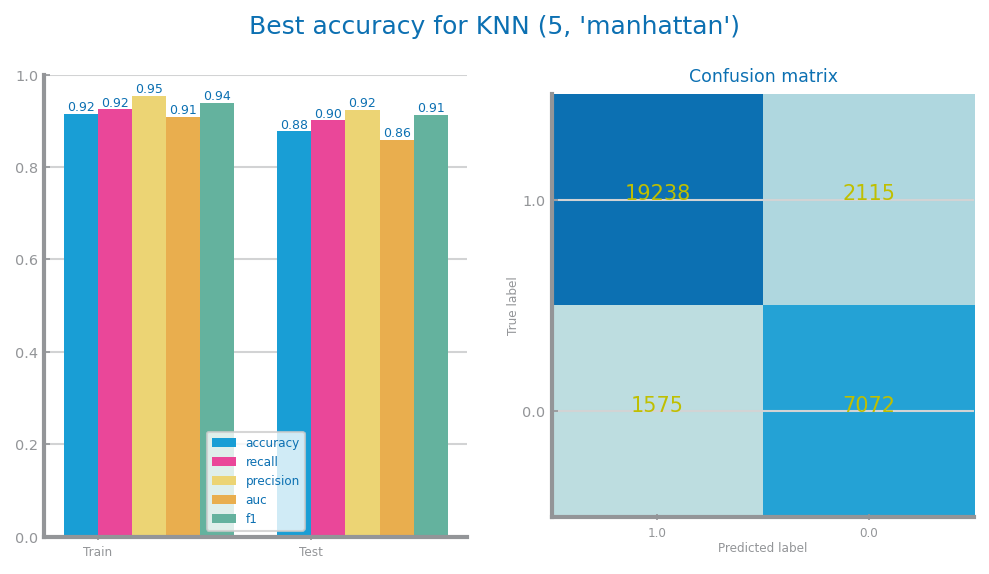

In [10]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'images/modeling/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

## Overfitting

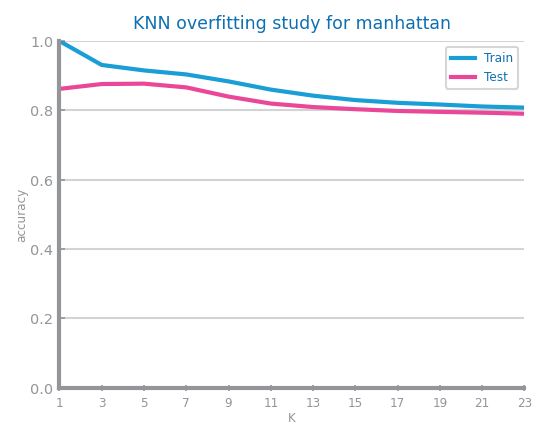

In [11]:
from matplotlib.pyplot import figure, savefig

distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/modeling/{file_tag}_knn_overfitting.png")
show()

# Decision Trees


## Parameters study

Train#=70000 Test#=30000
Labels=[1. 0.]
DT best with gini and d=14


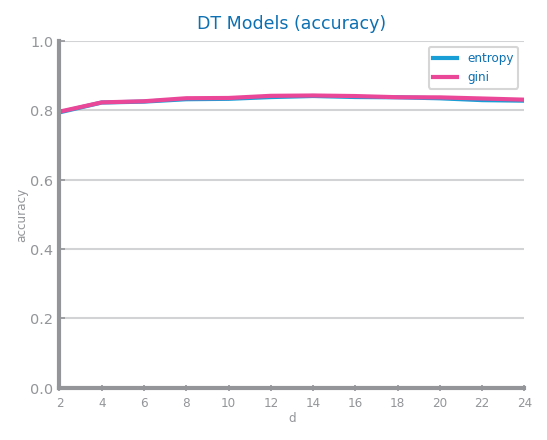

In [12]:
from typing import Literal
from numpy import array, ndarray
from matplotlib.pyplot import figure, savefig, show
from sklearn.tree import DecisionTreeClassifier
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, read_train_test_from_files
from dslabs_functions import plot_evaluation_results, plot_multiline_chart


def trees_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, d_max: int=10, lag:int=2, metric='accuracy'
        ) -> tuple:
    criteria: list[Literal['entropy', 'gini']] = ['entropy', 'gini']
    depths: list[int] = [i for i in range(2, d_max+1, lag)]

    best_model: DecisionTreeClassifier | None = None
    best_params: dict = {'name': 'DT', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict = {}
    for c in criteria:
        y_tst_values: list[float] = []
        for d in depths:
            clf = DecisionTreeClassifier(max_depth=d, criterion=c, min_impurity_decrease=0)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance = eval
                best_params['params'] = (c, d)
                best_model = clf
            # print(f'DT {c} and d={d}')
        values[c] = y_tst_values
    print(f'DT best with {best_params['params'][0]} and d={best_params['params'][1]}')
    plot_multiline_chart(depths, values, title=f'DT Models ({metric})', xlabel='d', ylabel=metric, percentage=True)

    return best_model, best_params


eval_metric = 'accuracy'
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = trees_study(trnX, trnY, tstX, tstY, d_max=25, metric=eval_metric)
savefig(f'images/modeling/{file_tag}_dt_{eval_metric}_study.png')
show()

## Best results

<Figure size 600x450 with 0 Axes>

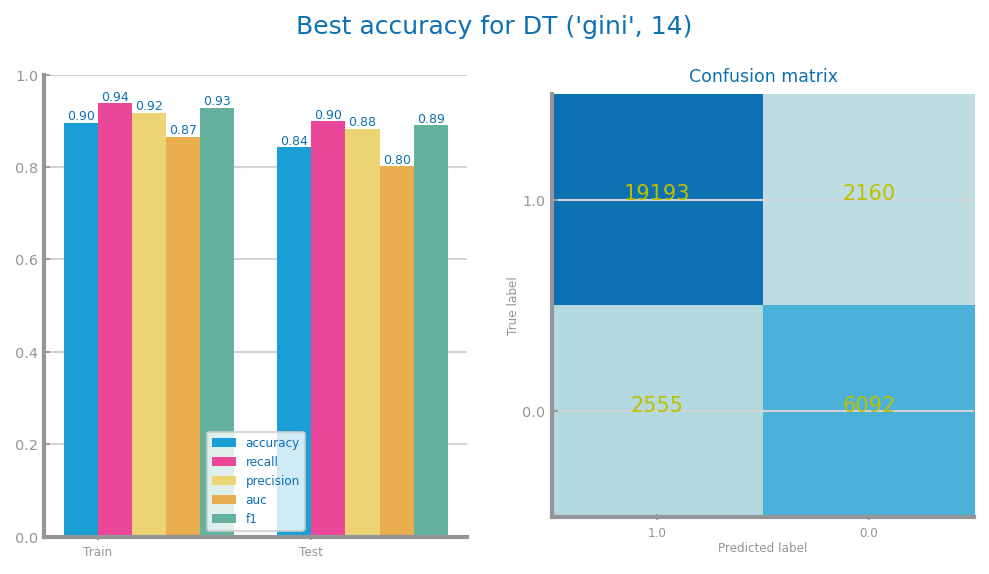

In [13]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'images/modeling/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
show()

## Best tree

In [14]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis
from subprocess import call

'''
tree_filename: str = f"images/modeling/{file_tag}_dt_{eval_metric}_best_tree"
max_depth2show = 4
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)
# Convert to png
call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)

figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
axis("off")
show()
'''

'\ntree_filename: str = f"images/modeling/{file_tag}_dt_{eval_metric}_best_tree"\nmax_depth2show = 4\nst_labels: list[str] = [str(value) for value in labels]\n\ndot_data: str = export_graphviz(\n    best_model,\n    out_file=tree_filename + ".dot",\n    max_depth=max_depth2show,\n    feature_names=vars,\n    class_names=st_labels,\n    filled=True,\n    rounded=True,\n    impurity=False,\n    special_characters=True,\n    precision=2,\n)\n# Convert to png\ncall(\n    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]\n)\n\nfigure(figsize=(14, 6))\nimshow(imread(tree_filename + ".png"))\naxis("off")\nshow()\n'

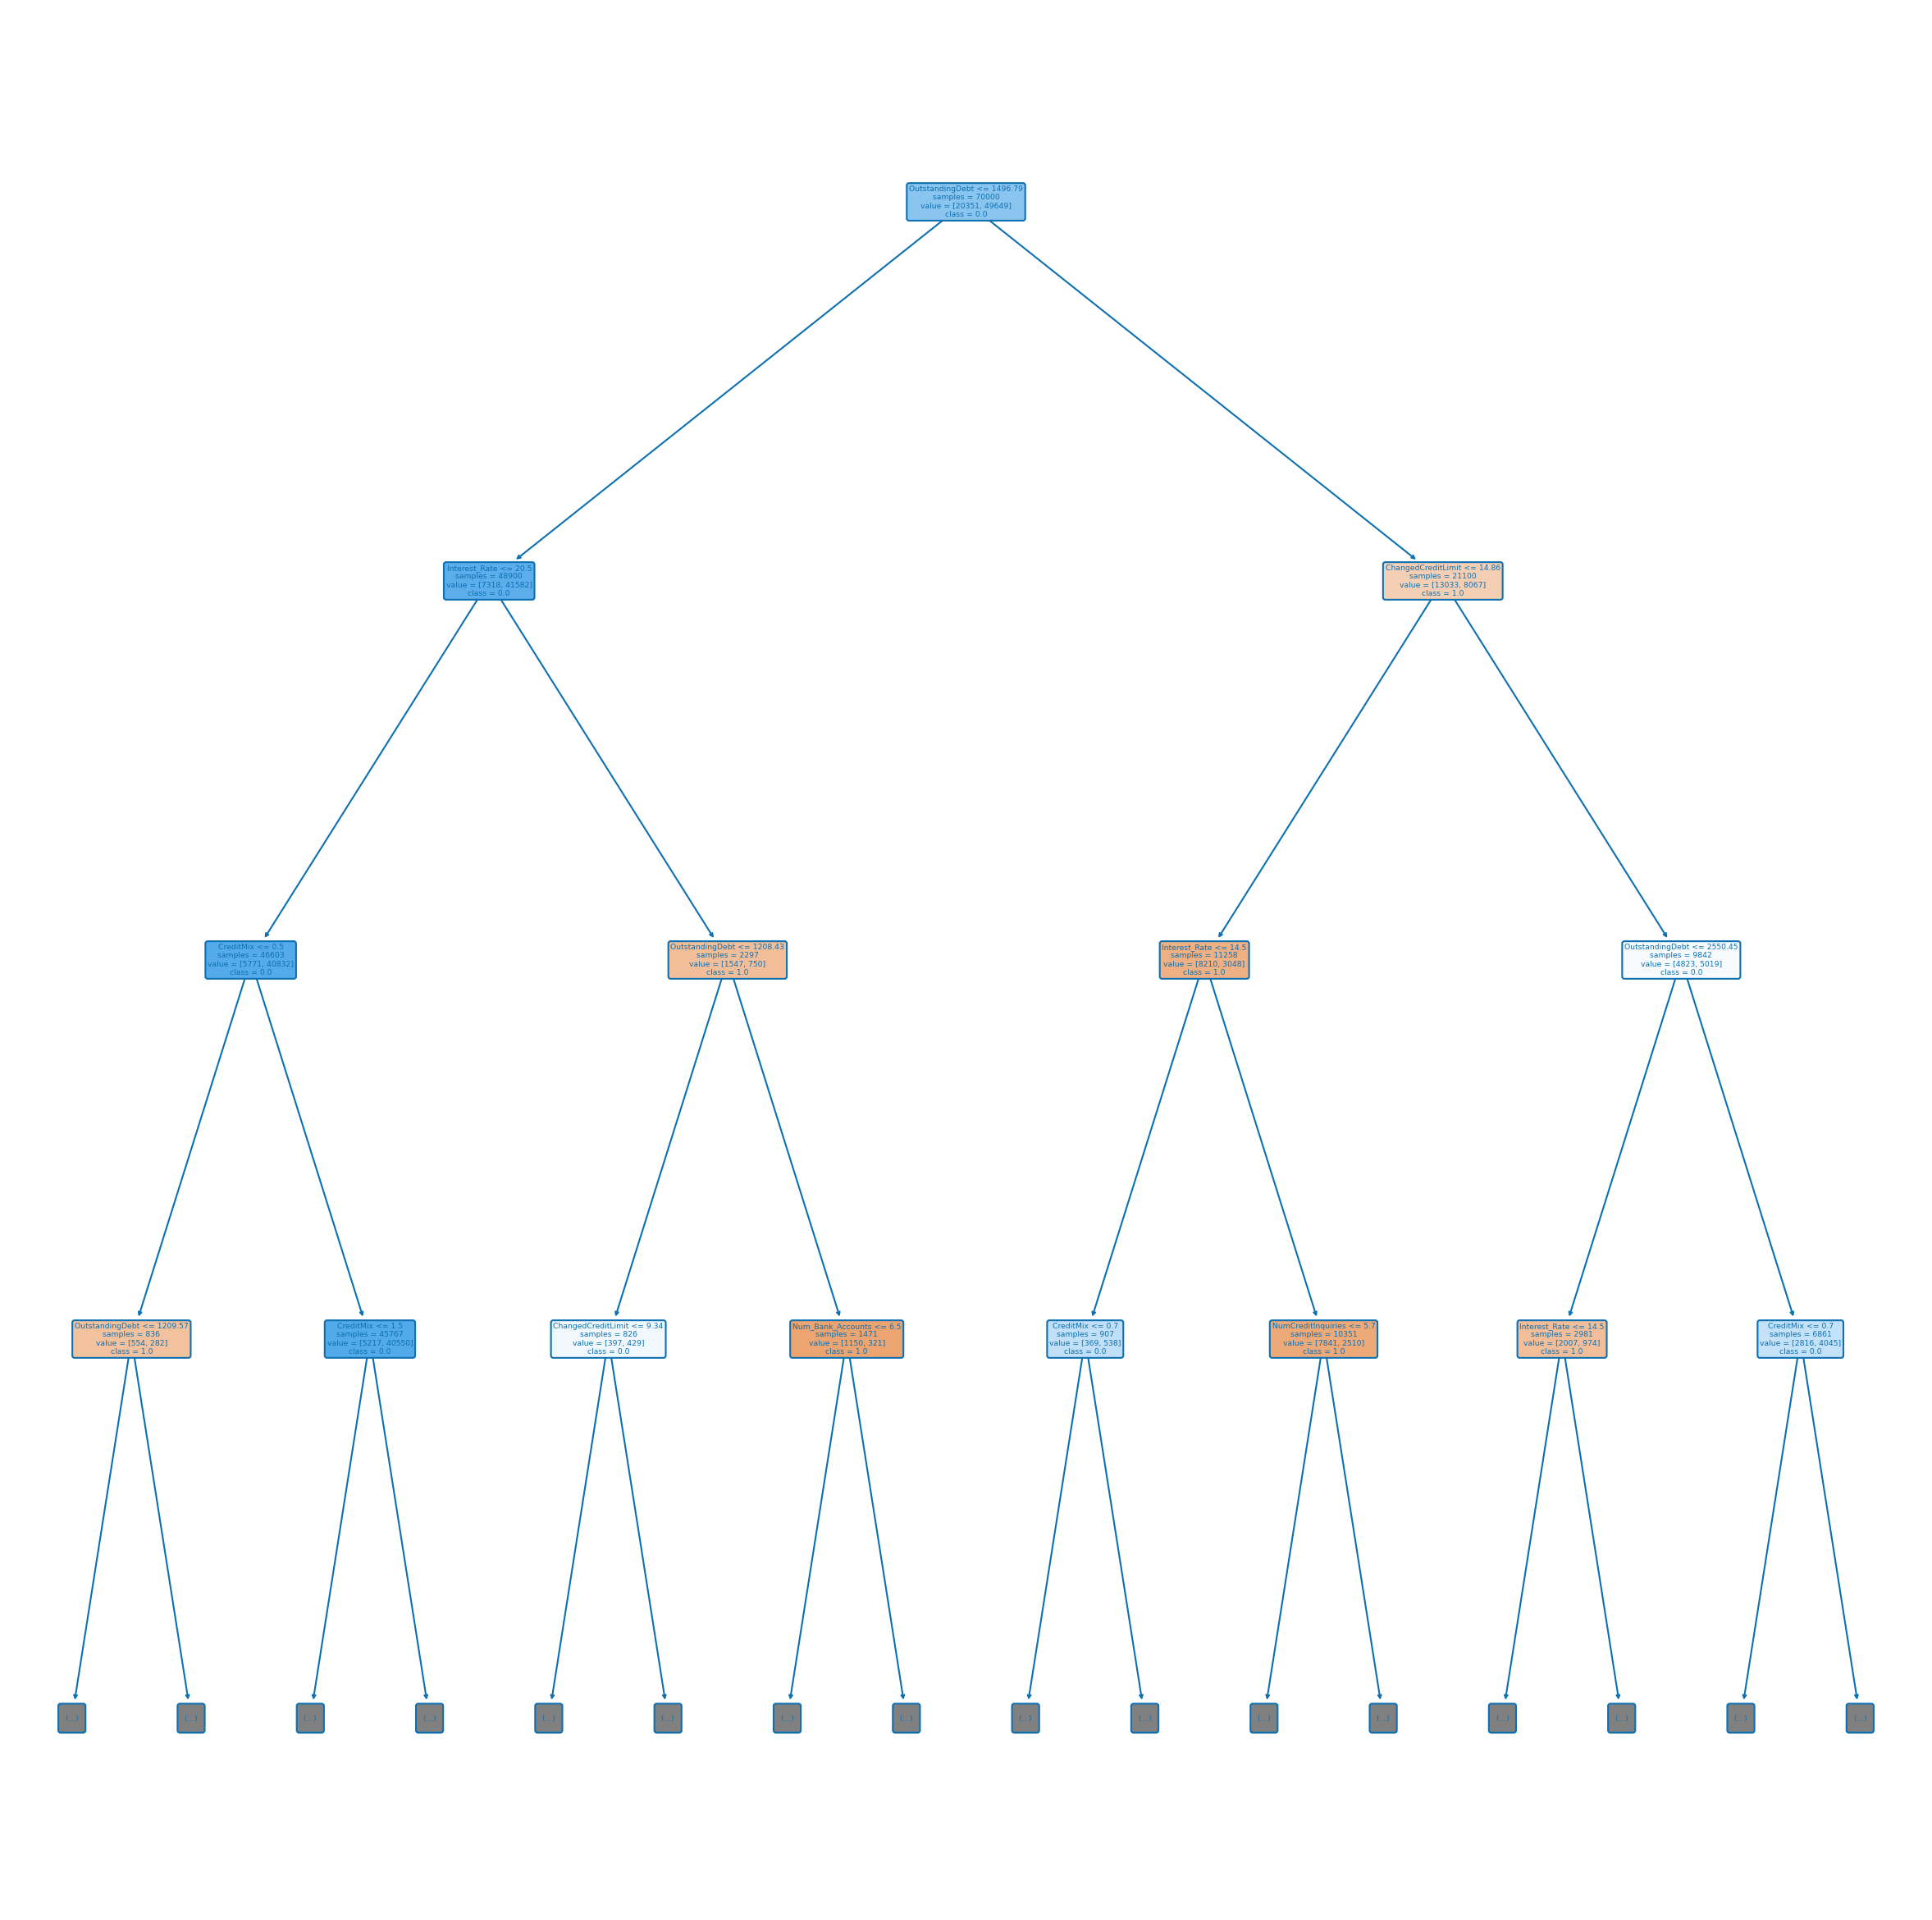

In [15]:
# Print a simpler version of the tree:

from sklearn.tree import plot_tree

tree_filename: str = f"images/modeling/{file_tag}_dt_{eval_metric}_best_tree"
max_depth2show = 3
st_labels: list[str] = [str(value) for value in labels]

figure(figsize=(20, 20))
plot_tree(
    best_model,
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)
savefig(tree_filename + "_simple.png")

## Variables relevancy

1. OutstandingDebt (0.4111453815793673)
2. Interest_Rate (0.10751739342993738)
3. ChangedCreditLimit (0.058040662828858856)
4. Delay_from_due_date (0.05234903623230105)
5. CreditMix (0.043047431880499296)
6. Credit_History_Age_Months (0.024596238516693972)
7. NumofDelayedPayment (0.02453840350412441)
8. TotalEMIpermonth (0.024475867500625036)
9. SSN_Area_Code (0.02348373277538311)
10. Num_Credit_Card (0.021977713230010406)
11. MonthlyBalance (0.019098257534478465)
12. Annual_Income (0.018725789088786825)
13. Customer_ID (0.018350869837362536)
14. Age (0.01817022988419816)
15. Monthly_Inhand_Salary (0.01773488309109963)
16. CreditUtilizationRatio (0.01588213954375907)
17. NumCreditInquiries (0.01585391005533606)
18. Amountinvestedmonthly (0.013038347637940775)
19. Num_Bank_Accounts (0.011983062811141452)
20. Occupation_Number (0.005414544826606765)
21. Loan_Type_Personal_Loan (0.004639475897144052)
22. Loan_Type_Debt_Consolidation_Loan (0.00460308210716334)
23. Loan_Type_Home_Equity_Loa

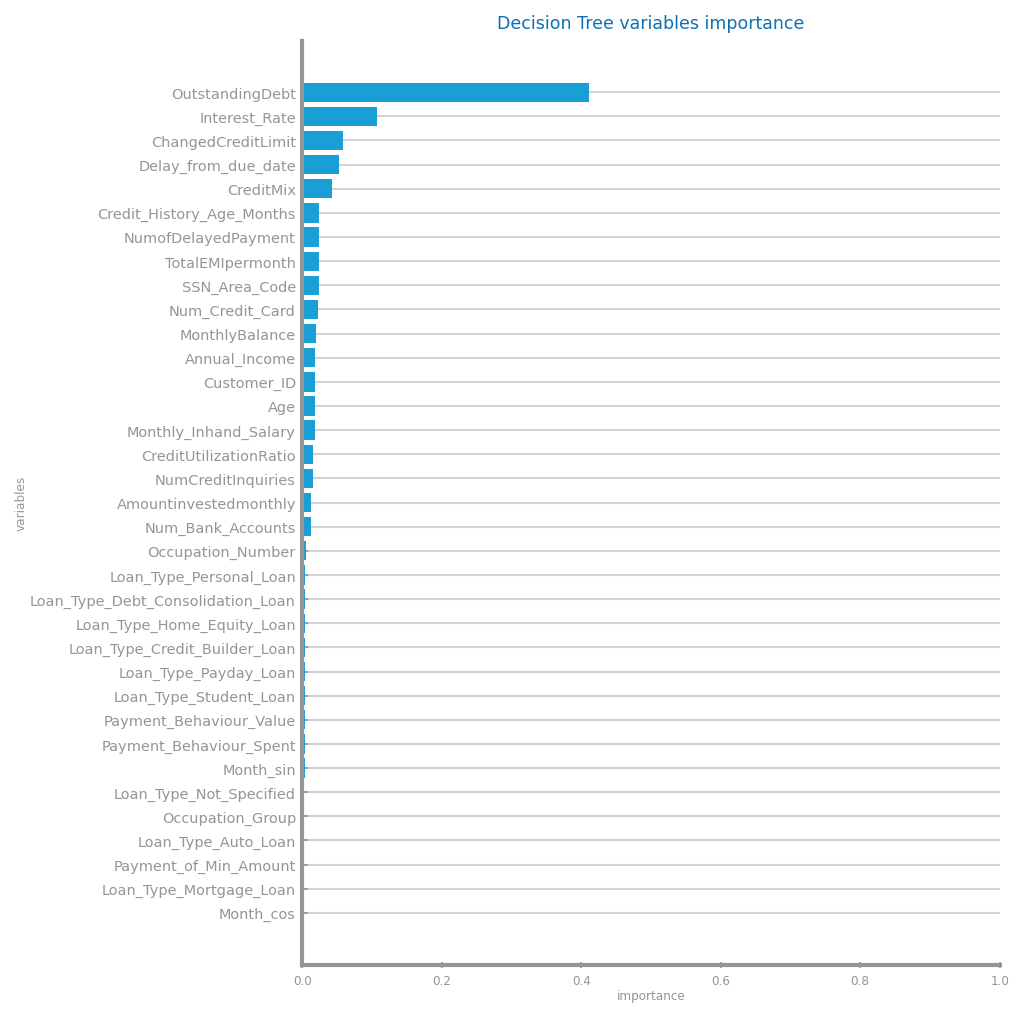

In [16]:
from numpy import argsort
from dslabs_functions import plot_horizontal_bar_chart

importances = best_model.feature_importances_
indices: list[int] = argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure(figsize=(6, 8))
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"images/modeling/{file_tag}_dt_{eval_metric}_vars_ranking.png")

## Overfitting

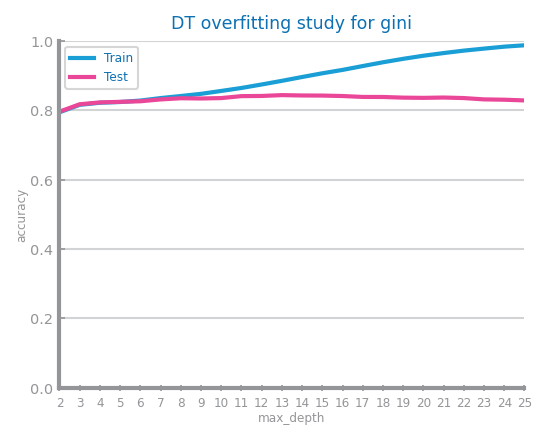

In [17]:
crit: Literal["entropy", "gini"] = params["params"][0]
d_max = 25
depths: list[int] = [i for i in range(2, d_max + 1, 1)]
y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric = "accuracy"
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion=crit, min_impurity_decrease=0)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"DT overfitting study for {crit}",
    xlabel="max_depth",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/modeling/{file_tag}_dt_{eval_metric}_overfitting.png")